In [132]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

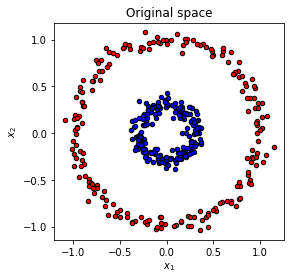

In [173]:
np.random.seed(42)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)


# Plot results

plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [134]:
#divide train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size=0.30)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_train = torch.reshape(y_train, [-1, 1])
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_test = torch.reshape(y_test, [-1, 1])

In [135]:
class BinaryClass(torch.nn.Module):
    def __init__(self, n_input):
        super(BinaryClass, self).__init__()
        self.linear1 = torch.nn.Linear(n_input, 3)
        self.linear2 = torch.nn.Linear(3, 1)
        
    def forward(self, X):
        out = self.linear1(X)
        out = torch.sigmoid(out)
        out = self.linear2(out)
        out = torch.sigmoid(out)
        
        return out

In [ ]:
w1 = torch.rand([3, 3], requires_grad=True)
w2 = torch.rand([4, 1], requires_grad=True)

In [153]:

def BinaryClassManual(X):

    n_samples, _ = X.shape
    ones = torch.ones([n_samples, 1])

    X1 = torch.cat((X, ones), 1)
    out = torch.matmul(X1, w1)
    out = torch.sigmoid(out)
    print(out)
    H1 =  torch.cat((out, ones), 1)
    out = torch.matmul(H1, w2)
    out = torch.sigmoid(out)
    return out

In [143]:
n_epoch = 100000
l_rate = 0.01

model = BinaryClass(2)
criterion = torch.nn.BCELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)
optimizer = torch.optim.SGD([w1, w2], lr=l_rate)

tic = time.perf_counter()

for epoch in range(n_epoch):
    
    #prediction
    #y_pred = model(X_train)
    y_pred = BinaryClassManual(X_train)
    #calculate loss
    loss = criterion(y_pred, y_train)
    #calculate gradients
    loss.backward()
    #update gradients
    optimizer.step()
    #zero grad
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f'epoch: {epoch} loss: {loss.item()}')

toc = time.perf_counter()

print(f"Time elapsed: {toc - tic:0.4f} seconds")

epoch: 99 loss: 0.7203035950660706
epoch: 199 loss: 0.7006304860115051
epoch: 299 loss: 0.6935498118400574
epoch: 399 loss: 0.6910269856452942
epoch: 499 loss: 0.690116286277771
epoch: 599 loss: 0.6897706389427185
epoch: 699 loss: 0.6896222829818726
epoch: 799 loss: 0.6895425319671631
epoch: 899 loss: 0.6894864439964294
epoch: 999 loss: 0.6894381642341614
epoch: 1099 loss: 0.6893926858901978
epoch: 1199 loss: 0.6893477439880371
epoch: 1299 loss: 0.6893026828765869
epoch: 1399 loss: 0.6892573833465576
epoch: 1499 loss: 0.6892117261886597
epoch: 1599 loss: 0.6891655325889587
epoch: 1699 loss: 0.6891190409660339
epoch: 1799 loss: 0.6890720725059509
epoch: 1899 loss: 0.6890246272087097
epoch: 1999 loss: 0.6889766454696655
epoch: 2099 loss: 0.6889283061027527
epoch: 2199 loss: 0.6888794898986816
epoch: 2299 loss: 0.6888300180435181
epoch: 2399 loss: 0.6887801885604858
epoch: 2499 loss: 0.6887297630310059
epoch: 2599 loss: 0.6886788010597229
epoch: 2699 loss: 0.688627302646637
epoch: 2799 lo

epoch: 22299 loss: 0.637596845626831
epoch: 22399 loss: 0.6370023488998413
epoch: 22499 loss: 0.6364052891731262
epoch: 22599 loss: 0.6358058452606201
epoch: 22699 loss: 0.6352038979530334
epoch: 22799 loss: 0.6345999240875244
epoch: 22899 loss: 0.6339932084083557
epoch: 22999 loss: 0.6333844065666199
epoch: 23099 loss: 0.6327735185623169
epoch: 23199 loss: 0.6321601867675781
epoch: 23299 loss: 0.6315447688102722
epoch: 23399 loss: 0.630927324295044
epoch: 23499 loss: 0.6303079128265381
epoch: 23599 loss: 0.6296862959861755
epoch: 23699 loss: 0.6290627717971802
epoch: 23799 loss: 0.6284371018409729
epoch: 23899 loss: 0.6278093457221985
epoch: 23999 loss: 0.627179741859436
epoch: 24099 loss: 0.6265482306480408
epoch: 24199 loss: 0.6259147524833679
epoch: 24299 loss: 0.625279426574707
epoch: 24399 loss: 0.624642550945282
epoch: 24499 loss: 0.6240038871765137
epoch: 24599 loss: 0.6233634948730469
epoch: 24699 loss: 0.6227213740348816
epoch: 24799 loss: 0.6220772862434387
epoch: 24899 loss

epoch: 44199 loss: 0.4220827519893646
epoch: 44299 loss: 0.4210722744464874
epoch: 44399 loss: 0.4200707674026489
epoch: 44499 loss: 0.41907837986946106
epoch: 44599 loss: 0.41809484362602234
epoch: 44699 loss: 0.41712021827697754
epoch: 44799 loss: 0.4161544144153595
epoch: 44899 loss: 0.4151974320411682
epoch: 44999 loss: 0.4142492711544037
epoch: 45099 loss: 0.4133097529411316
epoch: 45199 loss: 0.41237884759902954
epoch: 45299 loss: 0.4114566147327423
epoch: 45399 loss: 0.41054290533065796
epoch: 45499 loss: 0.4096377193927765
epoch: 45599 loss: 0.4087409973144531
epoch: 45699 loss: 0.4078526198863983
epoch: 45799 loss: 0.4069725573062897
epoch: 45899 loss: 0.4061007797718048
epoch: 45999 loss: 0.40523719787597656
epoch: 46099 loss: 0.40438172221183777
epoch: 46199 loss: 0.40353432297706604
epoch: 46299 loss: 0.40269485116004944
epoch: 46399 loss: 0.40186336636543274
epoch: 46499 loss: 0.4010396897792816
epoch: 46599 loss: 0.4002237915992737
epoch: 46699 loss: 0.3994155526161194
ep

epoch: 65899 loss: 0.3146822154521942
epoch: 65999 loss: 0.31420987844467163
epoch: 66099 loss: 0.31372958421707153
epoch: 66199 loss: 0.31324049830436707
epoch: 66299 loss: 0.3127424418926239
epoch: 66399 loss: 0.3122349679470062
epoch: 66499 loss: 0.3117181062698364
epoch: 66599 loss: 0.3111913204193115
epoch: 66699 loss: 0.3106541633605957
epoch: 66799 loss: 0.31010639667510986
epoch: 66899 loss: 0.30954766273498535
epoch: 66999 loss: 0.30897778272628784
epoch: 67099 loss: 0.30839627981185913
epoch: 67199 loss: 0.30780264735221863
epoch: 67299 loss: 0.30719664692878723
epoch: 67399 loss: 0.3065779209136963
epoch: 67499 loss: 0.30594635009765625
epoch: 67599 loss: 0.3053012788295746
epoch: 67699 loss: 0.3046424388885498
epoch: 67799 loss: 0.3039694130420685
epoch: 67899 loss: 0.3032817840576172
epoch: 67999 loss: 0.30257919430732727
epoch: 68099 loss: 0.3018615245819092
epoch: 68199 loss: 0.30112847685813904
epoch: 68299 loss: 0.30037960410118103
epoch: 68399 loss: 0.2996143400669098

epoch: 87399 loss: 0.08802967518568039
epoch: 87499 loss: 0.08754599094390869
epoch: 87599 loss: 0.08706724643707275
epoch: 87699 loss: 0.08659354597330093
epoch: 87799 loss: 0.08612460643053055
epoch: 87899 loss: 0.0856606587767601
epoch: 87999 loss: 0.08520165085792542
epoch: 88099 loss: 0.0847473293542862
epoch: 88199 loss: 0.08429785817861557
epoch: 88299 loss: 0.08385283499956131
epoch: 88399 loss: 0.08341246098279953
epoch: 88499 loss: 0.08297663927078247
epoch: 88599 loss: 0.08254522830247879
epoch: 88699 loss: 0.08211827278137207
epoch: 88799 loss: 0.08169552683830261
epoch: 88899 loss: 0.0812772884964943
epoch: 88999 loss: 0.08086293935775757
epoch: 89099 loss: 0.08045291900634766
epoch: 89199 loss: 0.08004704117774963
epoch: 89299 loss: 0.07964513450860977
epoch: 89399 loss: 0.0792473629117012
epoch: 89499 loss: 0.07885341346263885
epoch: 89599 loss: 0.07846322655677795
epoch: 89699 loss: 0.07807695865631104
epoch: 89799 loss: 0.07769463956356049
epoch: 89899 loss: 0.07731599

In [164]:
#x2_test = torch.tensor([[0.0, 0.9], [-0.88, 0.0], [0.9, 0.9], [0, 0], [0.05, -0.05]])
x2_test = torch.tensor([[0.0, 0.9]])

with torch.no_grad():
    
    #y_pred = model(X_test)
    y_pred = BinaryClassManual(x2_test)
    #y_pred_cls = y_pred.round()

    #accuracy = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])

    #print(f'Accuracy: {accuracy}')
    print(y_pred)

tensor([[0.0088, 0.9488, 0.9999]])
tensor([[0.0449]])


In [158]:
print(w1)
print(w2)

tensor([[ 5.3476, -0.6694,  6.0957],
        [-2.0305,  7.1217,  5.6748],
        [-2.8914, -3.4890,  3.6986]], requires_grad=True)
tensor([[-7.4228],
        [-8.2465],
        [ 8.2426],
        [-3.4073]], requires_grad=True)


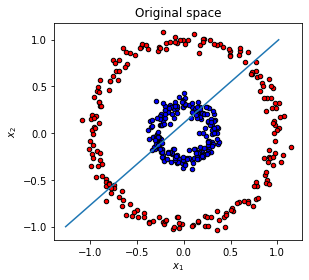

In [183]:
w1np = w1.detach().numpy()
w2np = w2.detach().numpy()
x1_b = np.linspace(-1, 1, 4)
x2_b = (w1np[0][1] + w1np[0][2] * x1_b) / w1np[0][0]

plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.plot(x2_b, x1_b, label = "Decision_Boundary")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()